In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv(r"C:\Users\ebello\OneDrive - United Against Poverty\Desktop\D.A.P\01 renewable-share-energy.csv")
print(data.head())

   Entity Code  Year  Renewables (% equivalent primary energy)
0  Africa  NaN  1965                                  5.747495
1  Africa  NaN  1966                                  6.122062
2  Africa  NaN  1967                                  6.325731
3  Africa  NaN  1968                                  7.005293
4  Africa  NaN  1969                                  7.956088


In [2]:
data.columns

Index(['Entity', 'Code', 'Year', 'Renewables (% equivalent primary energy)'], dtype='object')

In [3]:
df = data.drop(columns=['Code'], axis=1)

In [4]:
df.head()

,Entity,Year,Renewables (% equivalent primary energy)
0,Africa,1965,5.747495
1,Africa,1966,6.122062
2,Africa,1967,6.325731
3,Africa,1968,7.005293
4,Africa,1969,7.956088


In [5]:
df.describe()

,Year,Renewables (% equivalent primary energy)
count,5603.000000,5603.000000
mean,1993.800821,10.735585
std,16.283556,12.923945
min,1965.000000,0.000000
25%,1980.000000,1.980135
50%,1994.000000,6.522184
75%,2008.000000,14.099622
max,2021.000000,86.874535


In [6]:
df.isnull().sum()

Entity                                      0
Year                                        0
Renewables (% equivalent primary energy)    0
dtype: int64

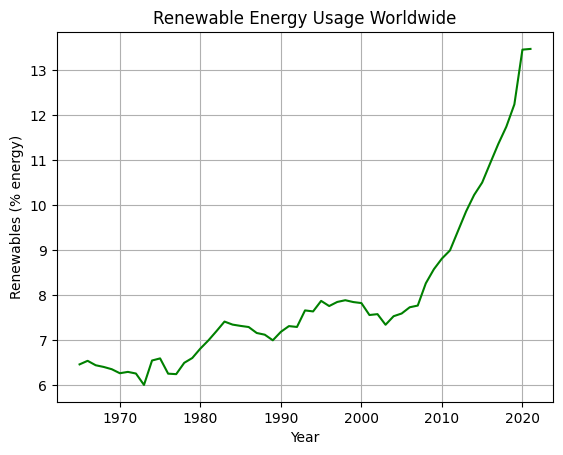

In [7]:
# Measuring the usage of renewables worldwide
world_data = df[df['Entity'] == 'World']
plt.plot(world_data['Year'], world_data['Renewables (% equivalent primary energy)'], color='green')
plt.xlabel('Year')
plt.ylabel("Renewables (% energy)")
plt.title("Renewable Energy Usage Worldwide")
plt.grid(True)
plt.show()

In [8]:
# Finding the countries with the highest renewable resource usage

top_usage = df.groupby(['Entity']).agg(Renewable_energy_mean=('Renewables (% equivalent primary energy)', 'mean')).reset_index()
sorted_country_usage = top_usage.sort_values(by='Renewable_energy_mean', ascending=False).head(5)

fig = px.bar(
    sorted_country_usage,
    x='Entity',
    y='Renewable_energy_mean',
    color='Entity'    
)

fig.update_layout(
    title = {
        'text': 'Highest Mean Renewable Resource Usage',
        'x': 0.5,
        'xanchor':'center',
        'yanchor':'top'
    },
    xaxis_title = 'Entity',
    yaxis_title = 'Renewable Energy Use',
)

fig.show()

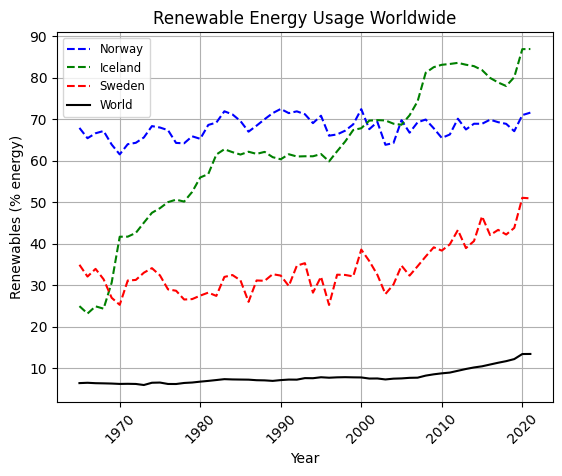

In [9]:
# Time series of the Top Countries
entity_data = df[df['Entity'] == 'Norway']
plt.plot(entity_data['Year'], entity_data['Renewables (% equivalent primary energy)'], label='Norway', color='blue', linestyle='--')

entitiy_data = df[df['Entity'] == 'Iceland']
plt.plot(entitiy_data['Year'], entitiy_data['Renewables (% equivalent primary energy)'], label='Iceland', color='green', linestyle='--')

entitiy_data = df[df['Entity'] == 'Sweden']
plt.plot(entitiy_data['Year'], entitiy_data['Renewables (% equivalent primary energy)'], label='Sweden', color='red', linestyle='--')

entitiy_data = df[df['Entity'] == 'World']
plt.plot(entitiy_data['Year'], entitiy_data['Renewables (% equivalent primary energy)'], label='World', color='black')


plt.xlabel('Year')
plt.ylabel("Renewables (% energy)")
plt.title("Renewable Energy Usage Worldwide")

plt.xticks(rotation=45)
plt.grid(True)
plt.legend(fontsize='small')

plt.show()

In [10]:
# Finding the Bottom 5 countries for renewable energy usage

bottom_usage = df.groupby(['Entity']).agg(Renewable_energy_mean=('Renewables (% equivalent primary energy)', 'mean')).reset_index()
sorted_country_usage = top_usage.sort_values(by='Renewable_energy_mean').head(5)

fig = px.bar(
    sorted_country_usage,
    x='Entity',
    y='Renewable_energy_mean',
    color='Entity'    
)

fig.update_layout(
    title = {
        'text': 'Lowest Mean Renewable Resource Usage',
        'x': 0.5,
        'xanchor':'center',
        'yanchor':'top'
    },
    xaxis_title = 'Entity',
    yaxis_title = 'Renewable Energy Use',
)

fig.show()

In [ ]:
# Time Series of all the nations